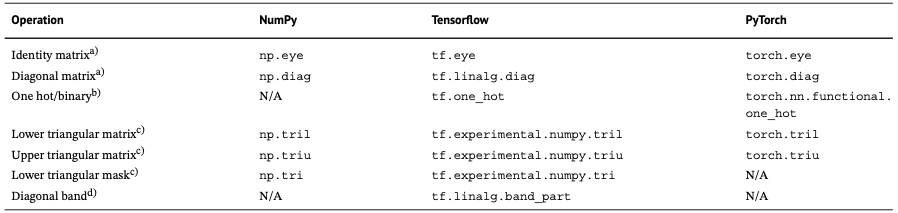

In [6]:
import numpy as np

print("Identity matrix:")
print(np.eye(4))

print("\nDiagonal matrix:")
print(np.diag([1, 2, 3, 4]))

print("\nOne hot/binary:")
print(np.eye(5)[2])

print("\nLower triangular matrix:")
print(np.tril(np.random.rand(4, 4)))

print("\nUpper triangular matrix:")
print(np.triu(np.random.rand(4, 4)))

print("\nLower triangular mask:")
print(np.tri(5, 5, k=0, dtype=int))

print("\nDiagonal band:")
A = np.arange(16).reshape(4, 4)
print("Original matrix:")
print(A)
print("Diagonal band (k=0):")
print(np.diag(np.diag(A)))
print("Diagonal band (k=1):")
print(np.diag(np.diag(A, k=1), k=1))
print("Diagonal band (k=-1):")
print(np.diag(np.diag(A, k=-1), k=-1))

Identity matrix:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Diagonal matrix:
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]

One hot/binary:
[0. 0. 1. 0. 0.]

Lower triangular matrix:
[[0.09933557 0.         0.         0.        ]
 [0.60912754 0.55338227 0.         0.        ]
 [0.95512056 0.89654052 0.49677275 0.        ]
 [0.04110305 0.45891217 0.16401478 0.430105  ]]

Upper triangular matrix:
[[0.50642759 0.25590561 0.83457064 0.26250698]
 [0.         0.78822455 0.26995642 0.99998925]
 [0.         0.         0.85790941 0.82849494]
 [0.         0.         0.         0.20624979]]

Lower triangular mask:
[[1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 1 0 0]
 [1 1 1 1 0]
 [1 1 1 1 1]]

Diagonal band:
Original matrix:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
Diagonal band (k=0):
[[ 0  0  0  0]
 [ 0  5  0  0]
 [ 0  0 10  0]
 [ 0  0  0 15]]
Diagonal band (k=1):
[[ 0  1  0  0]
 [ 0  0  6  0]
 [ 0  0  0 11]
 [ 0  0  0  0]]
Diagonal band (k=-1):
[[ 0  0  0  0]
 [ 4  0  0

In [8]:
print(A)
A[:, ::-1]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[ 3,  2,  1,  0],
       [ 7,  6,  5,  4],
       [11, 10,  9,  8],
       [15, 14, 13, 12]])

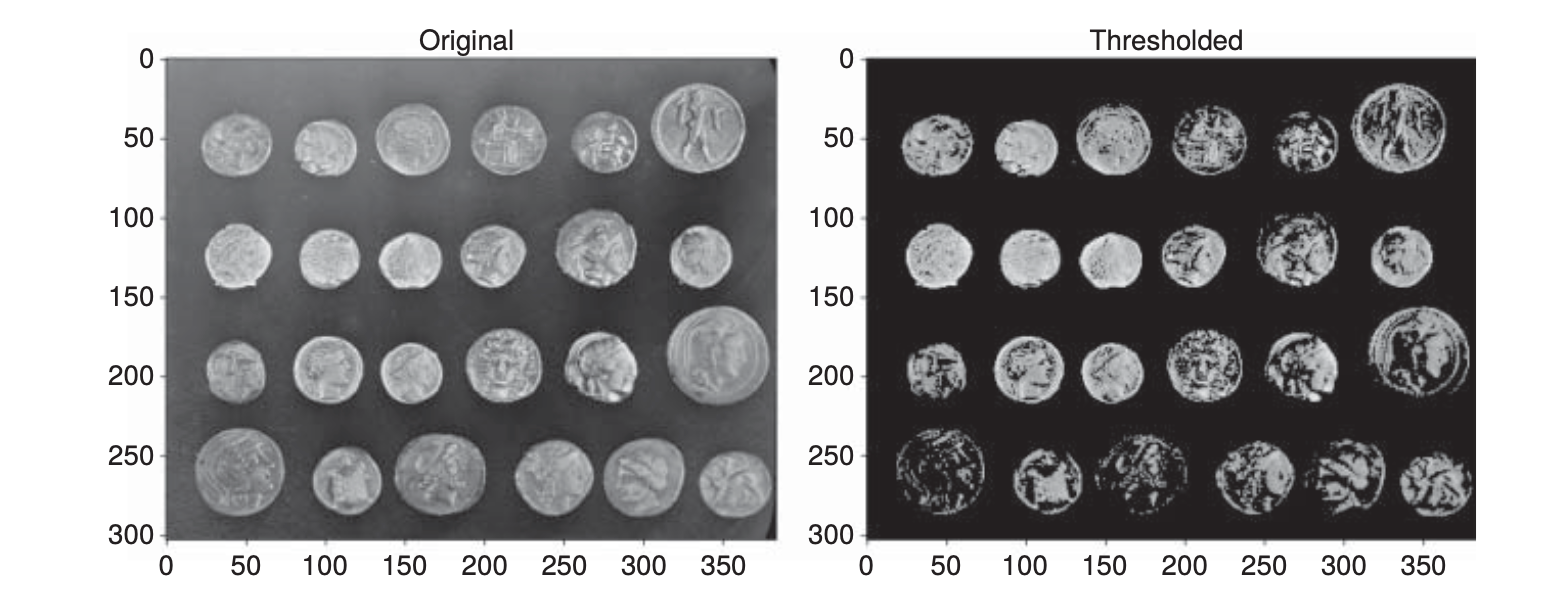

In [13]:
import numpy as np

X = np.arange(25).reshape(5, 5) + 1
# array([[ 1,  2,  3,  4,  5],
#        [ 6,  7,  8,  9, 10],
#        [11, 12, 13, 14, 15],
#        [16, 17, 18, 19, 20],
#        [21, 22, 23, 24, 25]])

# Create the cross-like mask
mask = np.zeros_like(X)
np.fill_diagonal(mask, 1)
mask = mask[:, ::-1] # now the anti-diagonal is filled
np.fill_diagonal(mask, 1)

# array([[1, 0, 0, 0, 1],
#        [0, 1, 0, 1, 0],
#        [0, 0, 1, 0, 0],
#        [0, 1, 0, 1, 0],
#        [1, 0, 0, 0, 1]])

# Apply the mask with multiplication
# equivalent to np.where(mask > 0, X, 0)
X = X * mask

# array([[ 1,  0,  0,  0,  5],
#        [ 0,  7,  0,  9,  0],
#        [ 0,  0, 13,  0,  0],
#        [ 0, 17,  0, 19,  0],
#        [21,  0,  0,  0, 25]])

X


array([[ 1,  0,  0,  0,  5],
       [ 0,  7,  0,  9,  0],
       [ 0,  0, 13,  0,  0],
       [ 0, 17,  0, 19,  0],
       [21,  0,  0,  0, 25]])

# bool ops

In [24]:
import numpy as np

def combine_mask(a, b=None, operation="not"):
    if operation != "not":
        assert b is not None, f"b is required for {operation}"
    
    if operation == "not": # b is ignored
        return 1 - a
    elif operation == "and":
        return a * b
    elif operation == "or":
        return np.minimum(a + b, 1)
    elif operation == "xor":
        return np.abs(a - b)
    else:
        raise ValueError(f"Unrecognized operation {operation}.")

# Example usage
mask_a = np.array([1, 0, 1, 0])
mask_b = np.array([1, 1, 0, 0])

print(f"NOT A: {combine_mask(mask_a, operation='not')}")
print(f"A AND B: {combine_mask(mask_a, mask_b, operation='and')}")
print(f"A OR B: {combine_mask(mask_a, mask_b, operation='or')}")
print(f"A XOR B: {combine_mask(mask_a, mask_b, operation='xor')}")

NOT A: [0 1 0 1]
A AND B: [1 0 0 0]
A OR B: [1 1 1 0]
A XOR B: [0 1 1 0]


In [30]:
import numpy as np

X = np.array([5, 3, 2, 6, 9])
mask = np.mod(X, 2) == 0 # even number
print(mask)
assert np.allclose(
    X[mask], 
    np.compress(mask, X) # array([2, 6])
)

print(np.compress(mask, X))

[False False  True  True False]
[2 6]


In [44]:
import numpy as np
from itertools import zip_longest

X = np.array([
    [7, 1, 4, 4],
    [5, 7, 6, 4],
    [7, 3, 1, 2],
])
y_np = np.pad(X, [(2, 2), (2, 2)], mode="constant", constant_values=0)

print(y_np)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 7 1 4 4 0 0]
 [0 0 5 7 6 4 0 0]
 [0 0 7 3 1 2 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [54]:
import numpy as np

data = np.array([[1, 2, 3],
                 [4, 5, 6]], dtype=int)

edge_padded = np.pad(data, pad_width=1, mode='edge')

wrap_padded = np.pad(data, pad_width=1, mode='wrap')

print("edge:\n",edge_padded)

print("wrap padding:\n",wrap_padded)

edge:
 [[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]
wrap padding:
 [[6 4 5 6 4]
 [3 1 2 3 1]
 [6 4 5 6 4]
 [3 1 2 3 1]]


In [60]:
import numpy as np

data = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12],
                 [13, 14, 15, 16]], dtype=int)

kernel_size = 3

valid_output = data[0:data.shape[0]-kernel_size+1, 0:data.shape[1]-kernel_size+1]

pad_val = (kernel_size - 1) // 2

same_padded_input = np.pad(data, pad_width=pad_val, mode='constant', constant_values=0)
same_output = same_padded_input[0:data.shape[0], 0:data.shape[1]]

print(data.shape)
print(valid_output.shape)
print(same_output.shape)

print(data)
print("\n\n", valid_output)

(4, 4)
(2, 2)
(4, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


 [[1 2]
 [5 6]]


## 5.3.2 Variable-Length Range via Masking

In [ ]:
import numpy as np

lengths = np.array([2, 4, 5, 3])
max_len = 5

row_indices = np.arange(max_len)
mask = row_indices < lengths[:, np.newaxis]

values = np.ones((4, max_len), dtype=int)
masked_values = values * mask

# fill with 1s based on the mask

print(mask)
print(masked_values)

[[ True  True False False False]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True False False]]
[[1 1 0 0 0]
 [1 1 1 1 0]
 [1 1 1 1 1]
 [1 1 1 0 0]]
